In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Student_Performance.csv')

In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data.shape

(10000, 6)

In [7]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
data.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [10]:
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [11]:
duplicates_count = data.duplicated().sum()
duplicates_count

np.int64(127)

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.shape

(9873, 6)

In [14]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

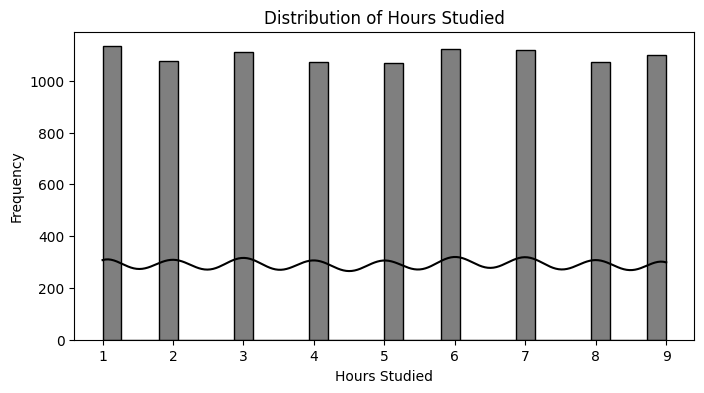

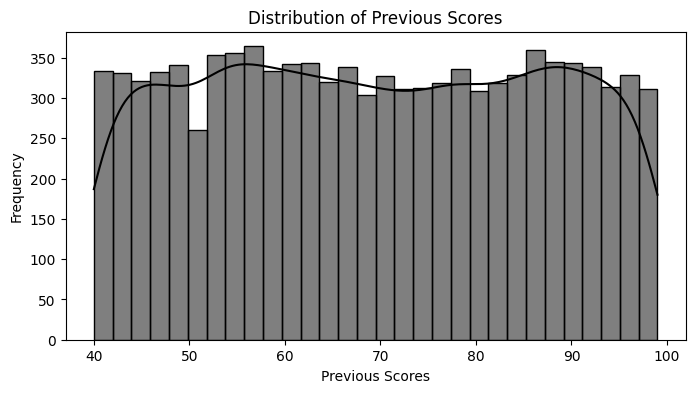

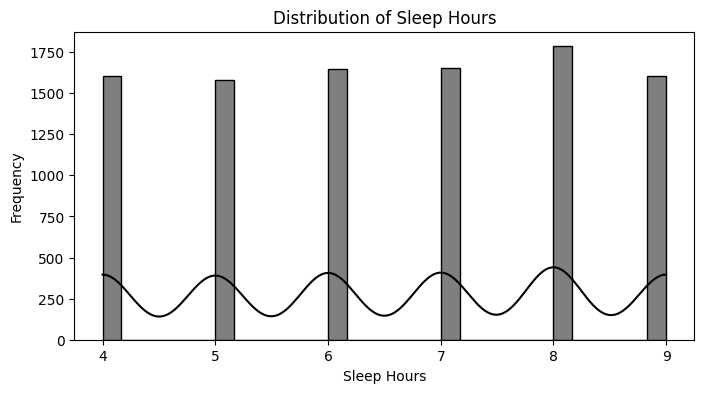

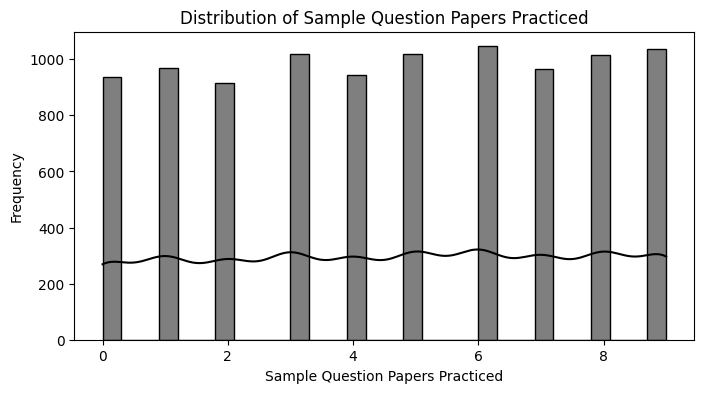

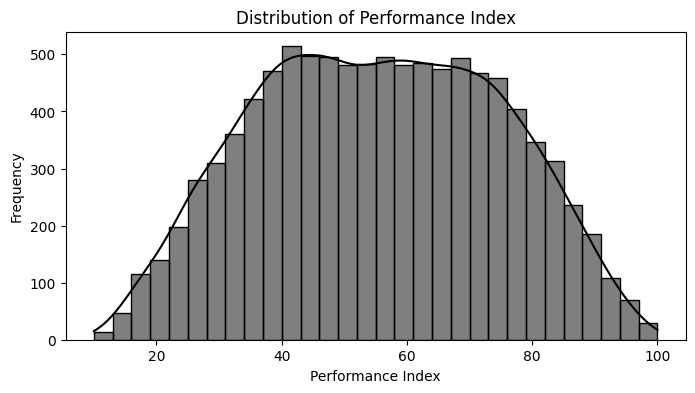

In [15]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='black')
    #sns.scatterplot(dataplot[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

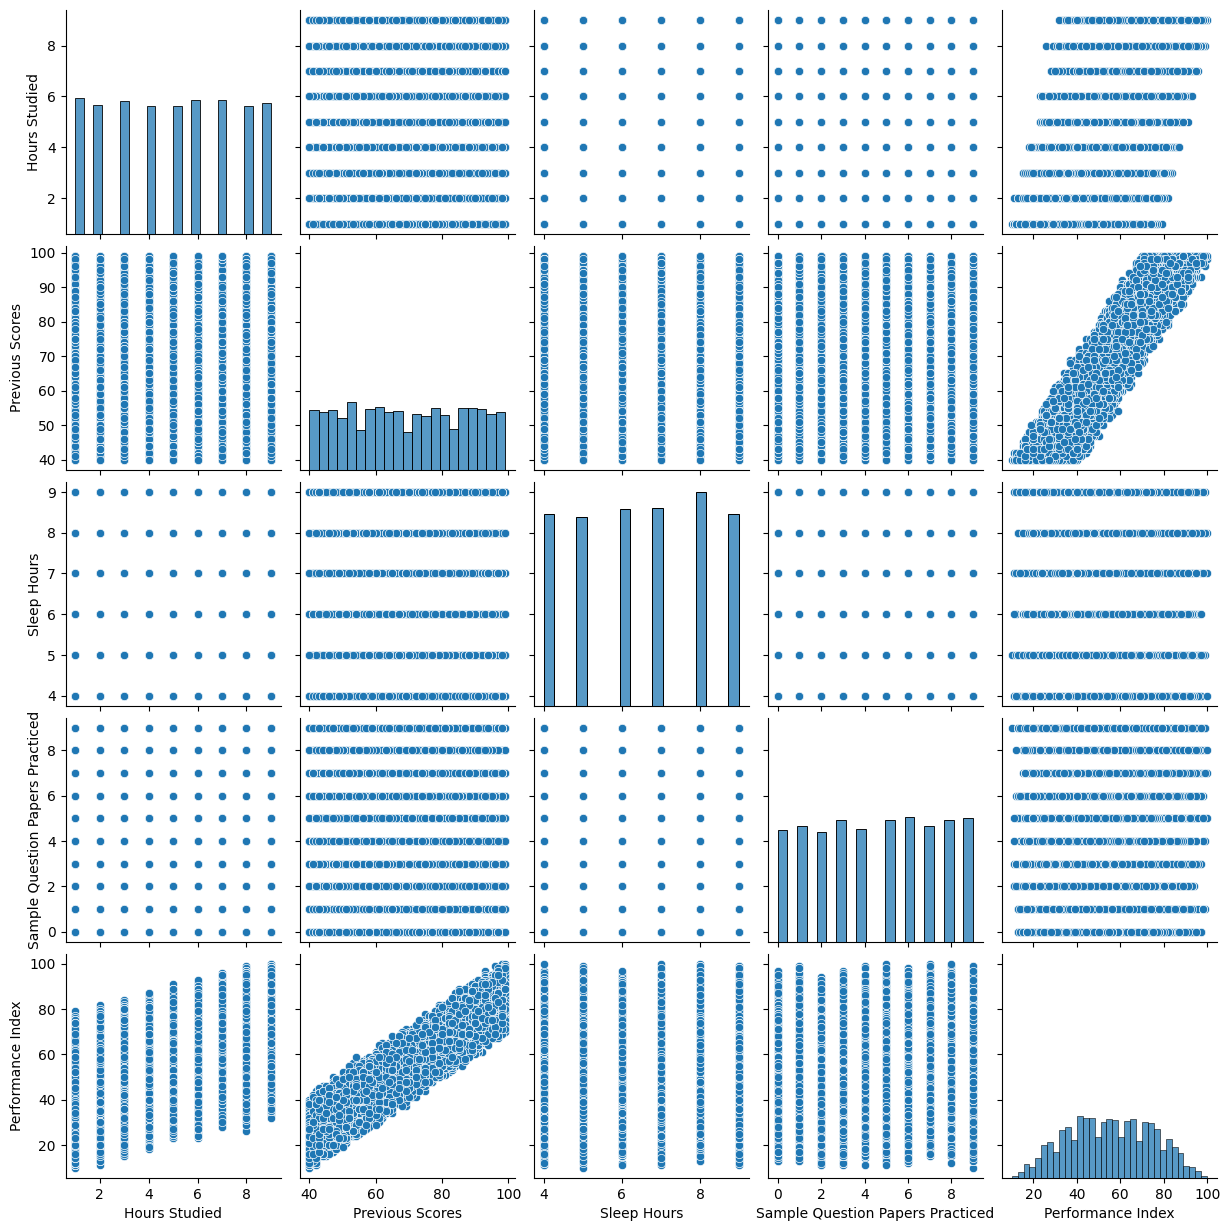

In [16]:
sns.pairplot(data = data)
plt.show()

In [17]:
data['Hours Studied'].value_counts()

,count
Hours Studied,
1,1133
6,1122
7,1118
3,1110
9,1099
2,1077
8,1074
4,1071
5,1069


### the values of the Hours Studied col is discreet so we make countplot

<function matplotlib.pyplot.show(close=None, block=None)>

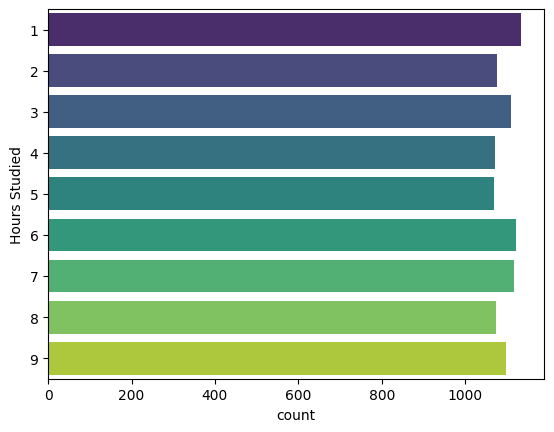

In [18]:
sns.countplot(y = data['Hours Studied'], palette = 'viridis')
plt.show

In [19]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

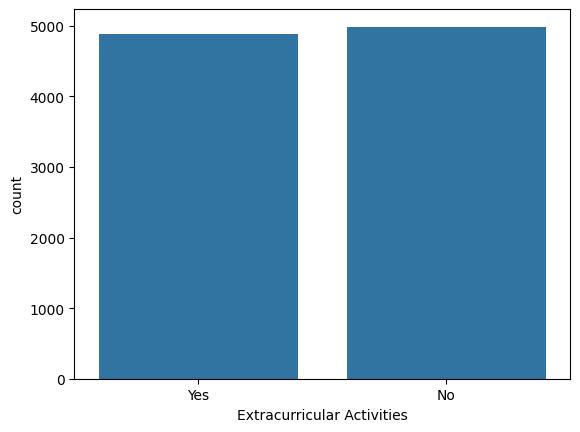

In [20]:
sns.countplot(x = data['Extracurricular Activities'])
plt.show()

In [21]:
data['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,4986
Yes,4887


In [22]:
data_group = data.groupby('Extracurricular Activities')['Performance Index'].sum()

In [23]:
data_group

,Performance Index
Extracurricular Activities,
No,272838.0
Yes,272316.0


<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

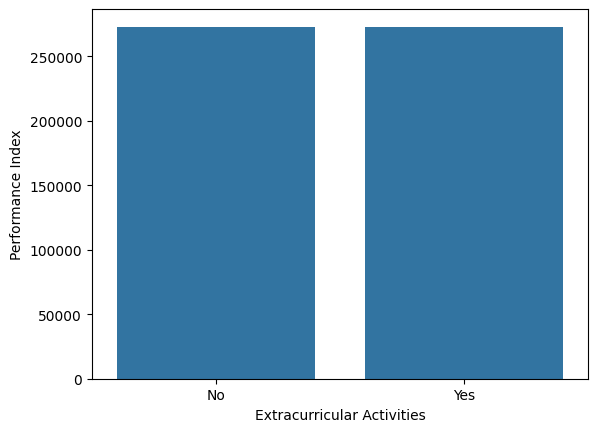

In [24]:
sns.barplot(data = data_group)

In [25]:
data_group_ = data.groupby('Extracurricular Activities').get_group('Yes')
data_group_

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
...,...,...,...,...,...,...
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

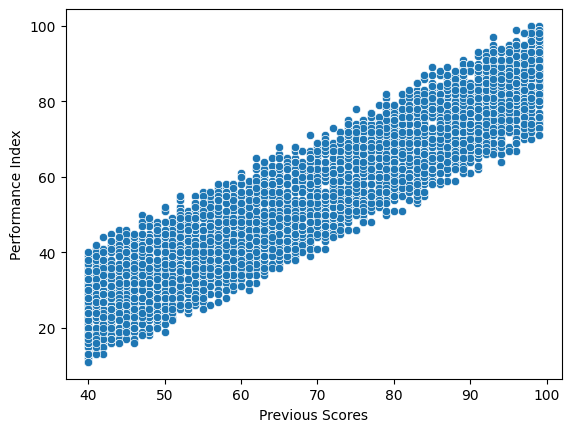

In [26]:
sns.scatterplot(x = 'Previous Scores', y = 'Performance Index', data = data_group_)

### There is positive correlation(b/w Performance Index & Previous Scores of Students) for the students who were involved in Extracurricular Activities

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

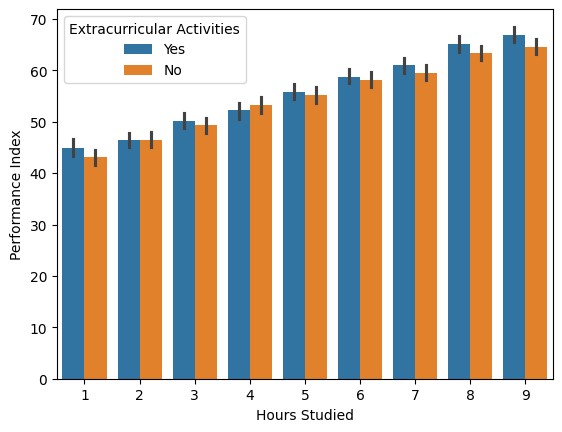

In [27]:
sns.barplot(y = 'Performance Index', x = 'Hours Studied', data = data, hue = 'Extracurricular Activities')

In [28]:
extra_reshaped = data['Extracurricular Activities'].values
extra_reshaped

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [29]:
extra_reshaped = data['Extracurricular Activities'].values.reshape(-1, 1)
extra_reshaped

array([['Yes'],
       ['No'],
       ['Yes'],
       ...,
       ['Yes'],
       ['Yes'],
       ['No']], dtype=object)

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
sparse = encoder.fit_transform(extra_reshaped).toarray()

In [31]:
sparse

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [32]:
encoder.categories_[0]

array(['No', 'Yes'], dtype=object)

In [33]:
data[encoder.categories_[0]] = sparse

In [34]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,Yes,9,1,91.0,0.0,1.0
1,4,82,No,4,2,65.0,1.0,0.0
2,8,51,Yes,7,2,45.0,0.0,1.0
3,5,52,Yes,5,2,36.0,0.0,1.0
4,7,75,No,8,5,66.0,1.0,0.0


In [35]:
data.select_dtypes(include = 'number')

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0.0,1.0
9996,7,64,8,5,58.0,0.0,1.0
9997,6,83,8,5,74.0,0.0,1.0
9998,9,97,7,0,95.0,0.0,1.0


In [36]:
data.drop('Extracurricular Activities', axis = 1, inplace = True)

In [37]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,9,1,91.0,0.0,1.0
1,4,82,4,2,65.0,1.0,0.0
2,8,51,7,2,45.0,0.0,1.0
3,5,52,5,2,36.0,0.0,1.0
4,7,75,8,5,66.0,1.0,0.0


In [38]:
X = data.drop('Performance Index', axis= 1)
y = data['Performance Index']

In [39]:
X[:2]

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,No,Yes
0,7,99,9,1,0.0,1.0
1,4,82,4,2,1.0,0.0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
scaler.fit_transform(X_train)

array([[ 0.00459934,  1.12989038,  0.86736523, -0.90318972, -1.01069277,
         1.01069277],
       [ 1.16392605, -0.6585421 , -0.31283127,  0.84066018, -1.01069277,
         1.01069277],
       [ 0.00459934,  0.09144572, -0.90292952,  1.18943017,  0.98942036,
        -0.98942036],
       ...,
       [-0.76828513,  1.59142135, -0.90292952, -0.55441974, -1.01069277,
         1.01069277],
       [-1.15472737,  0.66835942, -1.49302776,  1.53820015,  0.98942036,
        -0.98942036],
       [-1.15472737,  1.18758175, -1.49302776, -0.20564976,  0.98942036,
        -0.98942036]])

In [43]:
scaler.transform(X_test)

array([[ 0.77748381,  0.55297668,  1.45746347,  1.53820015, -1.01069277,
         1.01069277],
       [ 0.00459934, -1.46622129, -0.31283127, -1.60072968,  0.98942036,
        -0.98942036],
       [ 0.00459934, -0.94699895,  0.27726698,  0.84066018, -1.01069277,
         1.01069277],
       ...,
       [-1.54116961, -0.02393702, -1.49302776,  1.18943017,  0.98942036,
        -0.98942036],
       [ 1.16392605, -1.6392954 , -0.90292952,  0.14312022, -1.01069277,
         1.01069277],
       [ 1.55036828,  0.26451983, -1.49302776,  0.14312022, -1.01069277,
         1.01069277]])

In [44]:
X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,No,Yes
5135,5,89,8,2,0.0,1.0
9681,8,58,6,7,0.0,1.0
5507,5,71,5,8,1.0,0.0
4801,2,99,5,2,0.0,1.0
2839,4,43,7,9,1.0,0.0
...,...,...,...,...,...,...
9338,2,87,7,6,0.0,1.0
4886,2,70,5,1,1.0,0.0
3276,3,97,5,3,0.0,1.0
9971,2,81,4,9,1.0,0.0


## LinearRegession

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [46]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [47]:
y_test_pred = model_LR.predict(X_test)

In [48]:
train_score_LR = r2_score(y_train, model_LR.predict(X_train))
print(f'Train Score for LR: {train_score_LR}')

Train Score for LR: 0.9888967225498639


In [49]:
test_score_LR = r2_score(y_test, y_test_pred)
print(f'Test Score for LR: {test_score_LR}')

Test Score for LR: 0.9878120360079914


In [50]:
type(y_test), type(y_test_pred)

(pandas.core.series.Series, numpy.ndarray)

## KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [52]:
train_score_knn = r2_score(y_train, model_LR.predict(X_train))
print(f'Train Score for KNN: {train_score_knn}')

Train Score for KNN: 0.9888967225498639


In [53]:
test_score_knn = r2_score(y_test, y_test_pred)
print(f'Test Score for KNN: {test_score_knn}')

Test Score for KNN: 0.9878120360079914


## DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_depth = 4)

In [55]:
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [56]:
train_score_DT = r2_score(y_train, model_DT.predict(X_train))
print(f'Train Score for DT: {train_score_DT}')

Train Score for DT: 0.9372646974598303


In [57]:
test_score_DT = r2_score(y_test, model_DT.predict(X_test))
print(f'Test Score for DT: {test_score_DT}')

Test Score for DT: 0.9344877863771378


In [58]:
import joblib

# save the model
joblib.dump(model_LR, 'performance.pkl')

['performance.pkl']